## Data Import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import tools as tool
from tools import utils as util

In [2]:
data = pd.read_csv('data/House_Price.csv')

In [3]:
#selecting all columns that do not have numeric values
object_column = data.select_dtypes(include = ['object']).columns.tolist()

## Feature Processing (Label Encoding)

In [4]:
data = pd.read_csv('data/House_Price.csv')

In [5]:
for column in object_column:
    data = util.label_encoder(data, column)
lc_data = data

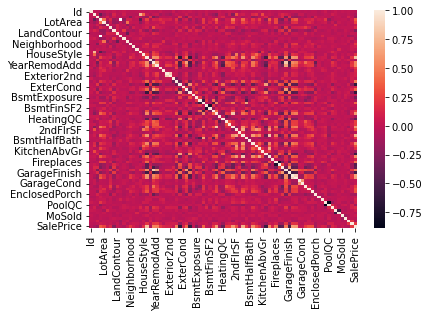

In [6]:
sns_plot = sns.heatmap(lc_data.corr())
fig = sns_plot.get_figure()
fig.savefig("figures/lc_data_heatmap")

In [7]:
threshold = 0.7

df_corr = lc_data.corr()

columns = np.full((df_corr.shape[0],), True, dtype=bool)

for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False


selected_columns = lc_data.columns[~columns]
high_correlation = lc_data[selected_columns]

In [8]:
absolute_corr = np.abs(df_corr["SalePrice"])
df_corr["SalePrice"][absolute_corr > 0.5]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
ExterQual      -0.636884
BsmtQual       -0.620886
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
KitchenQual    -0.589189
TotRmsAbvGrd    0.533723
GarageFinish   -0.549247
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [9]:
selected_columns

Index(['BldgType', 'Exterior2nd', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [10]:
high_correlation.corr()

,BldgType,Exterior2nd,1stFlrSF,TotRmsAbvGrd,GarageYrBlt,GarageArea,SalePrice
BldgType,1.000000,-0.142748,-0.073688,-0.198413,0.200367,-0.061421,-0.085591
Exterior2nd,-0.142748,1.000000,0.017361,0.068503,0.155058,0.095006,0.103766
1stFlrSF,-0.073688,0.017361,1.000000,0.409516,0.233449,0.489782,0.605852
TotRmsAbvGrd,-0.198413,0.068503,0.409516,1.000000,0.148112,0.337822,0.533723
GarageYrBlt,0.200367,0.155058,0.233449,0.148112,1.000000,0.564567,0.486362
GarageArea,-0.061421,0.095006,0.489782,0.337822,0.564567,1.000000,0.623431
SalePrice,-0.085591,0.103766,0.605852,0.533723,0.486362,0.623431,1.000000


## Log Sale Price

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


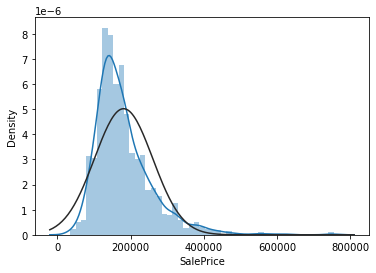

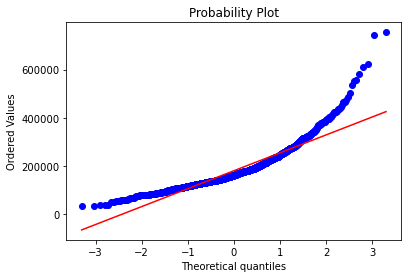

In [11]:
util.dist_and_prob_plot(data, 'SalePrice')

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


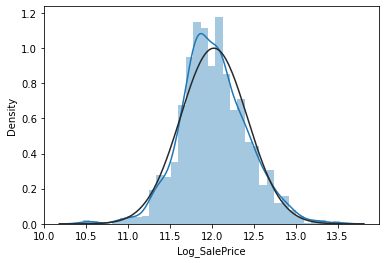

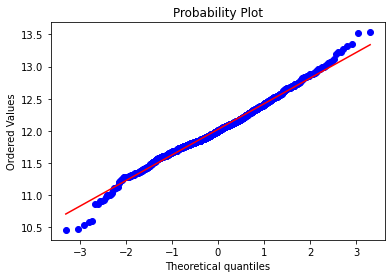

In [12]:
data['Log_SalePrice'] = np.log(data['SalePrice'])
util.dist_and_prob_plot(data, 'Log_SalePrice')

In [13]:
lc_data['SalePrice'] = np.log(lc_data['SalePrice'])
lc_data = lc_data.drop('Log_SalePrice', axis = 1)

## Random Forest Model (Label Encoding)

In [14]:
lc_data = lc_data.dropna()
X = lc_data.drop(['SalePrice', 'Id'], axis = 'columns')
y = lc_data['SalePrice']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [16]:
#made a dataframe with values greater than .001 importance
#sorted the values to look better on bargraph
dataframe = pd.DataFrame(rf.feature_importances_, rf.feature_names_in_)
a = dataframe[dataframe[0] > .001]
a = a.rename(columns = {0: 'values'})
b = a.sort_values('values', ascending = True)
b.head()

,values
ExterCond,0.001149
BsmtFullBath,0.001263
LotShape,0.001338
HeatingQC,0.001422
BsmtExposure,0.001510


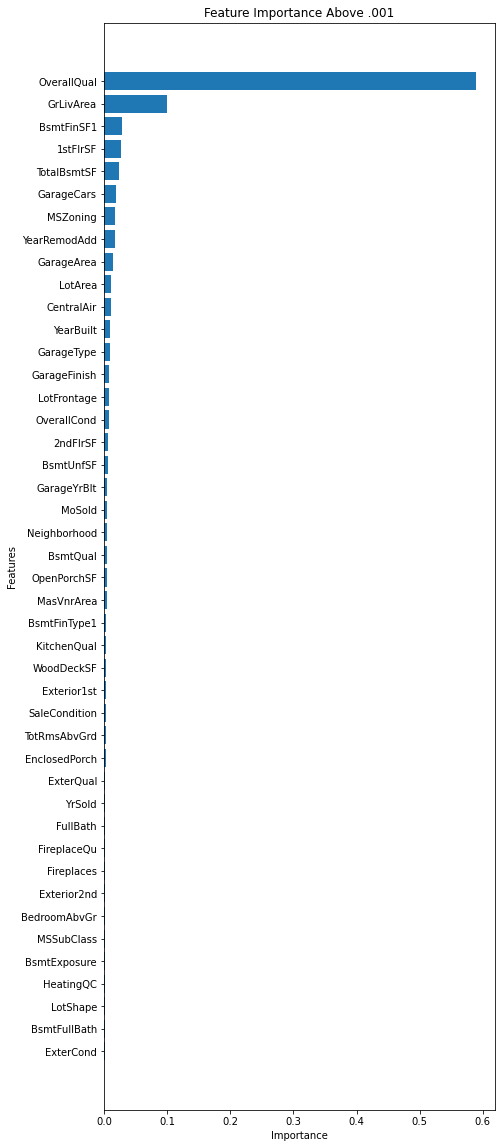

In [17]:
plt.figure(figsize=(7, 20))
plt.barh(b.index, b['values'])
plt.title('Feature Importance Above .001')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.savefig('figures/Top 45 Label Encoding Feature Importance)')

In [18]:
#made another dataframe with a smaller importance threshold
dataframe = pd.DataFrame(rf.feature_importances_, rf.feature_names_in_)
c = dataframe[dataframe[0] > .01]
c = c.rename(columns = {0: 'values'})
d = c.sort_values('values', ascending = True)
d

,values
CentralAir,0.011084
LotArea,0.011528
GarageArea,0.013996
YearRemodAdd,0.016781
MSZoning,0.016968
GarageCars,0.019248
TotalBsmtSF,0.023396
1stFlrSF,0.027145
BsmtFinSF1,0.028902
GrLivArea,0.099680


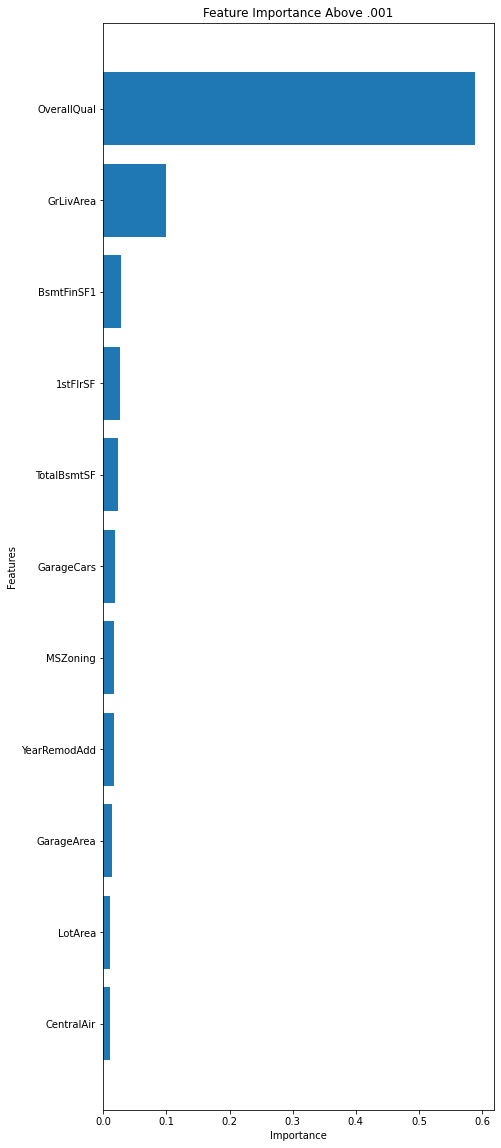

In [19]:
plt.figure(figsize=(7, 20))
plt.barh(d.index, d['values'])
plt.title('Feature Importance Above .001')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.savefig('figures/Top 10 Label Encoding Feature Importance)')

In [20]:
y_output = rf.predict(X_test)

In [21]:
print('MSE', mean_squared_error(y_test, y_output))
print('RMSE', (mean_squared_error(y_test, y_output)**(1/2)))
print('Adj R^2 value:', r2_score(y_test, y_output))

MSE 0.023055229822417964
RMSE 0.15183948703291236
Adj R^2 value: 0.8674853640823365


In [22]:
pd.DataFrame({'Type of Error':['MSE', 'RMSE', 'Adj R^2 Value'],'Value' : [mean_squared_error(y_test, y_output), (mean_squared_error(y_test, y_output))** (1/2),  r2_score(y_test, y_output)]}).set_index('Type of Error').to_csv('data/LC_Error_Table.csv')
